<a href="https://colab.research.google.com/github/xMatuszek/polish_receipts/blob/main/receipts_data_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/WongKinYiu/yolov9
%cd yolov9
!pip3 install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 668, done.
remote: Counting objects: 100% (290/290), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 668 (delta 222), reused 199 (delta 199), pack-reused 378
Receiving objects: 100% (668/668), 3.22 MiB | 19.88 MiB/s, done.
Resolving deltas: 100% (269/269), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.7 MB/s eta 0:00:00


In [12]:
%cd /content

'/content/yolov9'

In [13]:
!mkdir -p /content/weights
!wget -P /content/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt

In [92]:
!pip install ultralytics

ERROR: Operation cancelled by user


In [18]:
# Load a model
model = YOLO('/content/weights/gelan-c.pt')  # load an official model
model = YOLO('/content/best.pt')  # load a custom trained model

# Export the model
model.export(format='onnx')

Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CPU (Intel Xeon 2.20GHz)


Fusing layers... 
gelan-c summary: 387 layers, 25230943 parameters, 0 gradients, 101.8 GFLOPs



PyTorch: starting from '/content/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) ((1, 9, 8400), ()) (195.2 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 85.2 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 11.3s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.16.0 opset 17...
ONNX: export success ✅ 17.9s, saved as '/content/best.onnx' (96.5 MB)

Export complete (26.7s)
Results saved to /content
Predict:         yolo predict task=detect model=/content/best.onnx imgsz=640  
Validate:        yolo val task=detect model=/content/best.onnx imgsz=640 data=None  
Visualize:       https://netron.app


'/content/best.onnx'

In [78]:
!python detect.py --weights /content/best.onnx --source /content/data/test.jpg --save-crop


detect: weights=['/content/best.onnx'], source=/content/data/test.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLO 🚀 v0.1-89-g93f1a28 Python-3.10.12 torch-2.2.1+cu121 CPU

Loading /content/best.onnx for ONNX Runtime inference...
image 1/1 /content/data/test.jpg: 640x640 1 bottom, 1 logo, 1 products, 1 top, 1 total, 2230.5ms
Speed: 1.9ms pre-process, 2230.5ms inference, 2.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


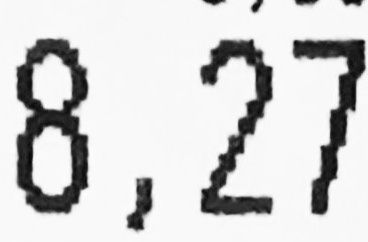

In [101]:
from IPython.display import Image
Image(filename=f"/content/yolov9/runs/detect/exp3/crops/total/test.jpg", width=600)

In [93]:
!pip install easyocr -q

In [102]:
import easyocr
reader = easyocr.Reader(['en','pl']) # this needs to run only once to load the model into memory
result = reader.readtext('/content/yolov9/runs/detect/exp3/crops/total/test.jpg', detail=0)

In [103]:
print(result)

['8,27']
